In [ ]:
#Importing .csv files
from google.colab import files
import pandas as pd

uploaded = files.upload()

dfs = {}

for filename in uploaded.keys():
  short_name = filename.replace(".csv"," ")
  dfs[short_name] = pd.read_csv(filename)
  print (f"Loaded {short_name}: {dfs[short_name].shape[0]} rows, {dfs[short_name].shape[1]} columns")




Saving LEC.csv to LEC.csv
Saving LCK.csv to LCK.csv
Saving LCS.csv to LCS.csv
Saving LPL.csv to LPL.csv
Loaded LEC : 82 rows, 25 columns
Loaded LCK : 75 rows, 25 columns
Loaded LCS : 75 rows, 25 columns
Loaded LPL : 100 rows, 25 columns


In [ ]:
#importing main regions dataset
LPL = pd.read_csv('/content/LPL.csv')
LCK = pd.read_csv('/content/LCK.csv')
LEC = pd.read_csv('/content/LEC.csv')
LCS = pd.read_csv('/content/LCS.csv')

#Cleaning datasets
LPL_clean = LPL.loc[:, ['Champion','B%']].rename(columns={'Champion':'Champions_LPL','B%':'B%_LPL'})
LCK_clean = LCK.loc[:, ['Champion','B%']].rename(columns={'Champion':'Champions_LCK','B%':'B%_LCK'})
LEC_clean = LEC.loc[:, ['Champion','B%']].rename(columns={'Champion':'Champions_LEC','B%':'B%_LEC'})
LCS_clean = LCS.loc[:, ['Champion','B%']].rename(columns={'Champion':'Champions_LCS','B%':'B%_LCS'})

#Joining Datasets
Spring = LPL_clean.join(LCK_clean).join(LEC_clean).join(LCS_clean)
#Change NaN to 0.0%
Spring = Spring.fillna('0.0%')
#change B% to floats
col_b = ['B%_LPL','B%_LCK','B%_LEC','B%_LCS']
for col in col_b:
  Spring[col] = Spring[col].str.replace('%','')
  Spring[col] = Spring[col].astype(float)
  Spring = Spring[(Spring[col_b] != 0.0).any(axis=1)]
#Combining Champion col
col_champ = ['Champions_LPL','Champions_LCK','Champions_LEC','Champions_LCS']
Spring['Champion'] = Spring[col_champ].bfill(axis=1).iloc[:,0]
Spring = Spring.drop(columns=col_champ)
#Reordering champion col to left
Spring=Spring[['Champion'] + col_b]

Spring


,Champion,B%_LPL,B%_LCK,B%_LEC,B%_LCS
0,Aatrox,3.9,6.3,2.7,16.7
1,Ahri,54.9,3.1,2.7,40.0
2,Akali,2.0,3.1,2.7,3.3
3,Alistar,2.0,12.5,0.0,3.3
4,Annie,9.8,0.0,2.7,0.0
...,...,...,...,...,...
91,Viego,13.7,0.0,0.0,0.0
93,Wukong,3.9,0.0,0.0,0.0
94,Xayah,2.0,0.0,0.0,0.0
95,Xin Zhao,31.4,0.0,0.0,0.0


In [ ]:
from collections import namedtuple
#counting no. unqiue bans
unique_bans = (Spring[col_b] > 0).sum().reset_index()
unique_bans.columns = ['Region','No. of Unique Bans']
print(unique_bans)

#calc ban conc
regions = ["LPL","LCK","LEC","LCS"]
b = {}

for r in regions:
  col_name = f'B%_{r}'
  top10_sum = Spring.nlargest(10, col_name)[col_name].sum()
  b[r] = float(top10_sum)

ban_conc = pd.DataFrame(list(b.items()), columns = ['Region','Ban Conc'])
print(ban_conc)

#measure variability
sd={}
for a in regions:
  col_name = f'B%_{a}'
  d = Spring[col_name].std()
  sd[a] = float(d)

ban_sd = pd.DataFrame(list(sd.items()), columns = ['Region','SD'])
print(ban_sd)


   Region  No. of Unique Bans
0  B%_LPL                  68
1  B%_LCK                  58
2  B%_LEC                  58
3  B%_LCS                  57
  Region  Ban Conc
0    LPL     533.3
1    LCK     512.7
2    LEC     573.0
3    LCS     466.7
  Region         SD
0    LPL  17.880257
1    LCK  17.012408
2    LEC  18.498121
3    LCS  15.897683


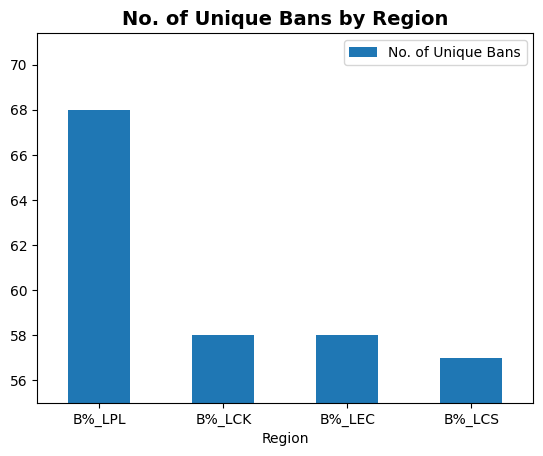

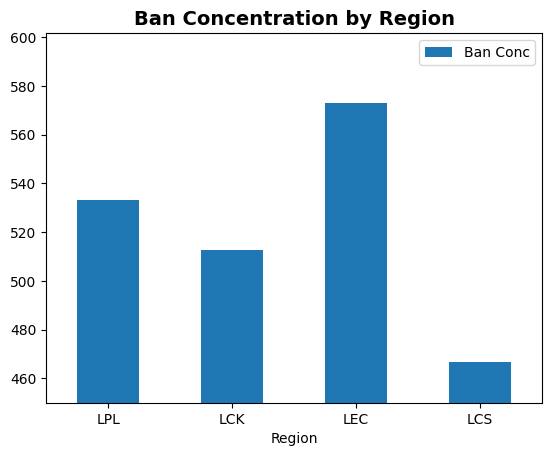

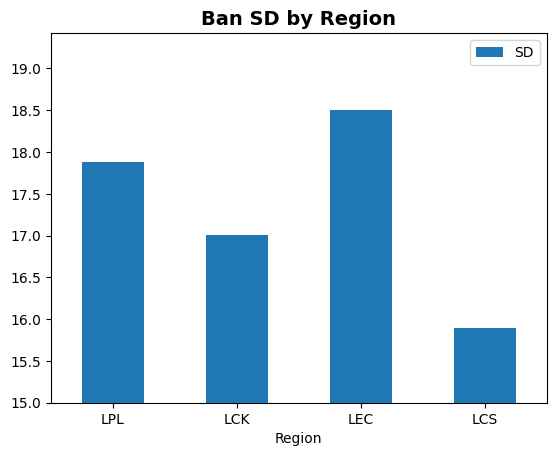

In [ ]:
import matplotlib.pyplot as plt
#plotting bar graphs for each of my metrics, y-axis = number, x-axis = region
unique_bans.plot.bar(x='Region', y='No. of Unique Bans', rot=0)
plt.title('No. of Unique Bans by Region', fontsize = 14, weight = 'bold')
plt.ylim(55, None)
plt.show()

ban_conc.plot.bar(x='Region', y='Ban Conc', rot=0)
plt.title('Ban Concentration by Region', fontsize = 14, weight = 'bold')
plt.ylim(450, None)
plt.show()

ban_sd.plot.bar(x='Region', y='SD', rot=0)
plt.title('Ban SD by Region', fontsize = 14, weight = 'bold')
plt.ylim(15, None)
plt.show()